# Data

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


In [0]:
from google.colab import files
fnames = files.upload()

In [0]:
x = []
y = []
fnames_keys = list(fnames.keys())
fnames_keys.sort()
for fname in fnames_keys:
    tmp = open('temp.bmp','wb')
    tmp.write(fnames[fname])
    tmp.close()
    tmp = plt.imread('temp.bmp')
    r = tmp[:,:,0]
    g = tmp[:,:,1]
    b = tmp[:,:,2]
    # Convert RGB to grayscale for simplicity, taken from https://stackoverflow.com/q/687261
    x.append(0.2989*r + 0.5870*g + 0.1140*b)
    y.append(int(fname[0]))
X = np.array(x)
Y = np.array(y)

## Split the given images to train an test groups

In [0]:
import random

def split_train_test(X, Y, train_frac = 0.85):
    n_samples_per_letter = int(X.shape[0]/3)
    split = int(train_frac*n_samples_per_letter)
    r = list(range(n_samples_per_letter))
    random.shuffle(r)
    train_indices = r[:split]
    train_indices += list(map(lambda x: x+n_samples_per_letter, train_indices)) + list(map(lambda x: x + 2*n_samples_per_letter, train_indices))
    test_indices = r[split:]
    test_indices += list(map(lambda x: x+n_samples_per_letter, test_indices)) + list(map(lambda x: x + 2*n_samples_per_letter, test_indices))
    X_train = X[np.array(train_indices)]
    Y_train = Y[np.array(train_indices)]
    X_test = X[np.array(test_indices)]
    Y_test = Y[np.array(test_indices)]
    return (X_train, Y_train), (X_test, Y_test)

(X_train, Y_train), (X_test, Y_test) = split_train_test(X,Y)

In [0]:
# Save a copy of the original vectors before I manipulate them
x_train, y_train, x_test, y_test = X_train, Y_train, X_test, Y_test

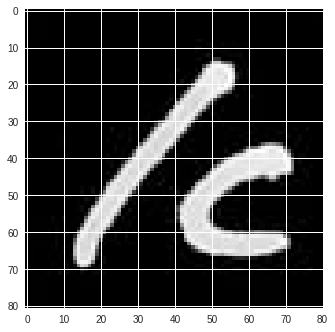

In [151]:
plt.imshow(X_train[0])

## Manipulate Data

In [0]:
X_train, X_test = x_train, x_test

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 81, 81, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 81, 81, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

# CNN Model

In [153]:
# create model
model = Sequential()
model.add(Conv2D(85, (5, 5), input_shape=(81, 81, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(28, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 77, 77, 85)        2210      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 85)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 28)        21448     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 28)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 28)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1372)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               175744    
__________

Train on 459 samples, validate on 81 samples
Epoch 1/10
 - 9s - loss: 1.1001 - acc: 0.3529 - val_loss: 1.1043 - val_acc: 0.3333
Epoch 2/10
 - 9s - loss: 1.1039 - acc: 0.3486 - val_loss: 1.0771 - val_acc: 0.6914
Epoch 3/10
 - 8s - loss: 1.0765 - acc: 0.4858 - val_loss: 1.0568 - val_acc: 0.5802
Epoch 4/10
 - 8s - loss: 1.0629 - acc: 0.4444 - val_loss: 1.0219 - val_acc: 0.6914
Epoch 5/10
 - 8s - loss: 1.0213 - acc: 0.6296 - val_loss: 0.9663 - val_acc: 0.8025
Epoch 6/10
 - 8s - loss: 0.9629 - acc: 0.7037 - val_loss: 0.8885 - val_acc: 0.7160
Epoch 7/10
 - 8s - loss: 0.8772 - acc: 0.7102 - val_loss: 0.7960 - val_acc: 0.7160
Epoch 8/10
 - 8s - loss: 0.8122 - acc: 0.7168 - val_loss: 0.7426 - val_acc: 0.7037
Epoch 9/10
 - 8s - loss: 0.7243 - acc: 0.7298 - val_loss: 0.6404 - val_acc: 0.7778
Epoch 10/10
 - 8s - loss: 0.6589 - acc: 0.7473 - val_loss: 0.5586 - val_acc: 0.8148


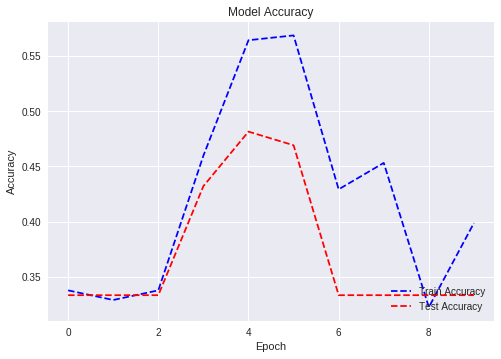

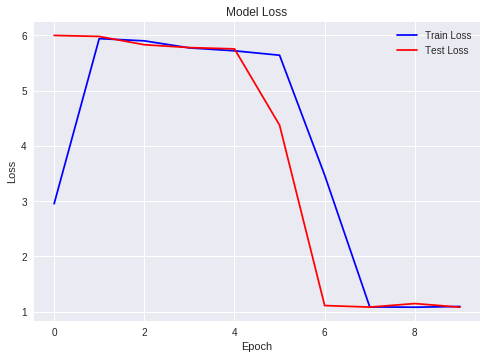

Large CNN Error: 18.52%


In [154]:
# Fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)

# Show training progress
plt.plot(history.history['acc'], 'b--')
plt.plot(history.history['val_acc'], 'r--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r-')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.show()

# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

# **Prediction **

In [155]:
def predict(im_path):
  tmp = plt.imread(im_path)
  
  r = tmp[:,:,0:1]
  g = tmp[:,:,1:2]
  b = tmp[:,:,2:3]

  x = 0.2989*r + 0.5870*g + 0.1140*b
  return np.argmax(model.predict(x.reshape(1,81,81,1)))

print(predict('0_0D9Z.bmp'))
print(predict('1_3znU.bmp'))
print(predict('2_1Bf5.bmp'))
print(predict('temp.bmp'))


0
1
2
2
